# Importovanje potrebnih paketa

In [ ]:
 import sys
 !{sys.executable} -m pip install tensorflow

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

# Učitavanje i preprocesiranje dataseta

In [52]:
dataset = pd.read_csv("csgo_round_snapshots.csv")
dataset.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [53]:
print("Shape before cleaning:", dataset.shape)
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
print("Shape after cleaning:", dataset.shape)

Shape before cleaning: (122410, 97)
Shape after cleaning: (122410, 97)


In [54]:
def clean(column_name):    
    """Make list from all values in column."""
    name = set()
    for name_string in dataset[column_name]:
        name.update(name_string.split(','))
    name = sorted(name)
    return name


def plot_column(column_name, n_elem_display=0):
    """ Plot the most frequently values in column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    if n_elem_display != 0:
        return nlt[:n_elem_display].plot(kind="bar", figsize=(10, 10))
    else:
        return nlt[:].plot(kind="bar", figsize=(10, 5))

<AxesSubplot:>

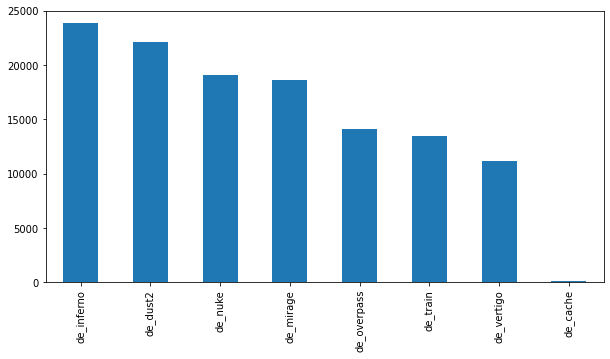

In [55]:
plot_column('map')

<AxesSubplot:>

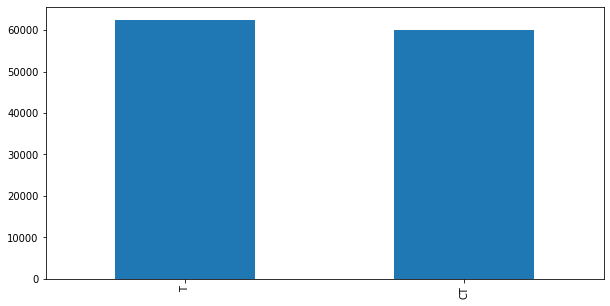

In [56]:
plot_column('round_winner')

In [57]:
dataset = pd.get_dummies(dataset,prefix=['map'], columns =['map'])

In [ ]:
for i in range(dataset.shape[0]):
    if dataset['round_winner'][i] == 'CT':
        dataset['round_winner'][i] = 1
    else:
        dataset['round_winner'][i] = 0

In [58]:
dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,round_winner_CT,round_winner_T
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0,1,0,0,0,0,0,0,1,0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,...,0,1,0,0,0,0,0,0,1,0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0,1,0,0,0,0,0,0,1,0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0,1,0,0,0,0,0,0,1,0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0,1,0,0,0,0,0,0,1,0


In [59]:
for i in range(dataset.shape[0]):
    if dataset['bomb_planted'][i] == 'FALSE':
        dataset['bomb_planted'][i] = 0.0
    else:
        dataset['bomb_planted'][i] = 1.0

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [60]:
dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,round_winner_CT,round_winner_T
0,175.00,0.0,0.0,True,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0,1,0,0,0,0,0,0,1,0
1,156.03,0.0,0.0,True,500.0,500.0,400.0,300.0,600.0,650.0,...,0,1,0,0,0,0,0,0,1,0
2,96.03,0.0,0.0,True,391.0,400.0,294.0,200.0,750.0,500.0,...,0,1,0,0,0,0,0,0,1,0
3,76.03,0.0,0.0,True,391.0,400.0,294.0,200.0,750.0,500.0,...,0,1,0,0,0,0,0,0,1,0
4,174.97,1.0,0.0,True,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (11,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)